<a href="https://colab.research.google.com/github/JAYANTHNITW/MultiTask_NLP_Project/blob/main/Sarcasm_Stress_Multitask_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("Dataset-Multitask4.csv")
df_train.tail()

,Unnamed: 0,Text,Sarcasm,Stress
16527,1829,Fmr. White House Doctor: It’s ‘ill advised’ to...,0,0
16528,1830,3 top health experts say the US is on the brin...,1,0
16529,1831,We have more than enough vaccines for NZ \n+ r...,0,0
16530,1832,"""Now is not the time to relax the critical saf...",0,0
16531,1833,A year after Missouri confirmed its first COVI...,1,0


In [4]:
df_test = pd.read_csv("Dataset-Multitask1.csv")
df_test.tail()

,Unnamed: 0,Text,Sarcasm,Stress
7284,1150,"@AngelLamuno @lunarossa Relax mate, we have a ...",0,0
7285,1151,"This doesn't mean that you relax on COVID 19, ...",0,0
7286,1152,Melbourne to relax third lockdown as no new CO...,0,0
7287,1153,JUST IN: Mayors vote 9-8 to put Metro Manila u...,0,0
7288,1154,"You can return to your social apps and news, b...",1,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16532 entries, 0 to 16531
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16532 non-null  int64 
 1   Text        16532 non-null  object
 2   Sarcasm     16532 non-null  int64 
 3   Stress      16532 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 516.8+ KB


In [6]:
df_train.shape

(16532, 4)

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train = df_train.drop_duplicates()

In [9]:
df_train.columns

Index(['Unnamed: 0', 'Text', 'Sarcasm', 'Stress'], dtype='object')

In [10]:
df_train = df_train.drop(['Unnamed: 0'],axis=1)
df_test = df_test.drop(['Unnamed: 0'],axis=1)

In [11]:
df_train = pd.concat([df_train,df_test],axis=0)

In [12]:
df_train.head()

,Text,Sarcasm,Stress
0,Peer-reviewed article that systematically deco...,0,1
1,Dealing with stress for children and youth liv...,0,1
2,"Pandemic living is stressful for everyone, eve...",0,1
3,"Stress leave, tears and insomnia: Greater Vict...",0,1
4,"Stress leave, tears and insomnia: Greater Vict...",0,1


In [13]:
df_test.head()

,Text,Sarcasm,Stress
0,Peer-reviewed article that systematically deco...,0,1
1,Dealing with stress for children and youth liv...,0,1
2,"Pandemic living is stressful for everyone, eve...",0,1
3,"Stress leave, tears and insomnia: Greater Vict...",0,1
4,"Stress leave, tears and insomnia: Greater Vict...",0,1


In [14]:
df_train.shape

(23821, 3)

In [15]:
df_train['Text'][0]

0    Peer-reviewed article that systematically deco...
0    Peer-reviewed article that systematically deco...
Name: Text, dtype: object

In [16]:
import gensim
import nltk
#from nltk import sent_tokenize
from gensim.utils import simple_preprocess

###  1 Lower casing

In [17]:
df_train['Text'] = df_train['Text'].str.lower()

### 2. HTML Tags

In [18]:
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [19]:
df_train['Text'] = df_train['Text'].apply(remove_html_tags)

### 3. Removing URL in Text

In [20]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\/S+')
  return pattern.sub(r'',text)

In [21]:
df_train['Text'] = df_train['Text'].apply(remove_url)

### 4. Removing Punctuations

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
exclude = string.punctuation

In [24]:
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [25]:
df_train['Text'] = df_train['Text'].apply(remove_punc)

### 5. Spelling Corrections

In [26]:
from textblob import TextBlob

In [27]:
def correct_spelling(text):
  blob = TextBlob(text)
  corrected_text = blob.correct()
  return str(corrected_text)

In [28]:
#df_train['Text'].apply(lambda x:correct_spelling(x))

In [29]:
df_train.head()

,Text,Sarcasm,Stress
0,peerreviewed article that systematically decon...,0,1
1,dealing with stress for children and youth liv...,0,1
2,pandemic living is stressful for everyone even...,0,1
3,stress leave tears and insomnia greater victor...,0,1
4,stress leave tears and insomnia greater victor...,0,1


### 6. Stemming

In [30]:
from nltk import PorterStemmer

In [31]:
stemmer = PorterStemmer()

In [32]:
df_train['Text'] = df_train['Text'].apply(lambda x:stemmer.stem(x))

### 8. Remove stopwords

In [33]:


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df_train['Text'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

0       peerreviewed article systematically deconstruc...
1       dealing stress children youth living diabetes ...
2       pandemic living stressful everyone even who’ve...
3       stress leave tears insomnia greater victoria t...
4       stress leave tears insomnia greater victoria t...
                              ...                        
7284    angellamuno lunarossa relax mate real covid19 ...
7285        doesnt mean relax covid 19 still us wearamask
7286    melbourne relax third lockdown new covid19 cas...
7287    mayors vote 98 put metro manila mgcq gcq march...
7288    return social apps news first make time availa...
Name: Text, Length: 23821, dtype: object

### 7. Tokenization

In [35]:
import nltk
from nltk import word_tokenize

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
df_train['Text'].apply(lambda x:word_tokenize(x))

0       [peerreviewed, article, that, systematically, ...
1       [dealing, with, stress, for, children, and, yo...
2       [pandemic, living, is, stressful, for, everyon...
3       [stress, leave, tears, and, insomnia, greater,...
4       [stress, leave, tears, and, insomnia, greater,...
                              ...                        
7284    [angellamuno, lunarossa, relax, mate, we, have...
7285    [this, doesnt, mean, that, you, relax, on, cov...
7286    [melbourne, to, relax, third, lockdown, as, no...
7287    [just, in, mayors, vote, 98, to, put, metro, m...
7288    [you, can, return, to, your, social, apps, and...
Name: Text, Length: 23821, dtype: object

In [38]:
df_train['Text'] = df_train['Text'].apply(lambda x:word_tokenize(x))

In [39]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Text'])

In [40]:
x = tokenizer.texts_to_sequences(df_train['Text'])

In [41]:
df_train['Text'].shape

(23821,)

In [42]:
max(len(seq) for seq in x)

33

In [43]:
# Vocabulary based on tokenization
vocabulary = tokenizer.word_index
print(len(vocabulary))

10899


In [44]:
vocabulary

{'the': 1,
 'covid19': 2,
 'to': 3,
 'stress': 4,
 'of': 5,
 'and': 6,
 'a': 7,
 'in': 8,
 'for': 9,
 'is': 10,
 'are': 11,
 'with': 12,
 'pandemic': 13,
 'on': 14,
 'as': 15,
 'you': 16,
 'relax': 17,
 '’': 18,
 'has': 19,
 'health': 20,
 'that': 21,
 'this': 22,
 'we': 23,
 'have': 24,
 'it': 25,
 'during': 26,
 'us': 27,
 'can': 28,
 'at': 29,
 'from': 30,
 'i': 31,
 'year': 32,
 'people': 33,
 'be': 34,
 'not': 35,
 'by': 36,
 'how': 37,
 'anxiety': 38,
 's': 39,
 '“': 40,
 'mental': 41,
 'our': 42,
 'been': 43,
 'covid': 44,
 'more': 45,
 'new': 46,
 'your': 47,
 'but': 48,
 'about': 49,
 'after': 50,
 'their': 51,
 'amp': 52,
 'many': 53,
 'help': 54,
 'time': 55,
 'some': 56,
 'or': 57,
 'high': 58,
 'just': 59,
 'was': 60,
 'if': 61,
 'one': 62,
 'an': 63,
 'vaccine': 64,
 'via': 65,
 'all': 66,
 'so': 67,
 'restrictions': 68,
 'what': 69,
 'will': 70,
 'way': 71,
 'out': 72,
 'now': 73,
 'my': 74,
 'due': 75,
 'cdc': 76,
 'its': 77,
 '19': 78,
 'need': 79,
 'too': 80,
 'worker

In [45]:
from gensim.models import Word2Vec

In [46]:
#review_text_lists= df_train['Text'].apply(gensim.utils.simple_preprocess)
#review_text_lists

In [47]:
df_train.head()

,Text,Sarcasm,Stress
0,"[peerreviewed, article, that, systematically, ...",0,1
1,"[dealing, with, stress, for, children, and, yo...",0,1
2,"[pandemic, living, is, stressful, for, everyon...",0,1
3,"[stress, leave, tears, and, insomnia, greater,...",0,1
4,"[stress, leave, tears, and, insomnia, greater,...",0,1


In [48]:
# import torch
# tensors = torch.tensor(df_train.values)

In [49]:
# model = Word2Vec(review_text_lists,vector_size=100, window=5, min_count=1, sg=0)

In [50]:
# model.train(review_text_lists,total_examples=model.corpus_count,epochs=model.epochs)

In [51]:
# import numpy as np

# # Tokenize the text in the 'text' column and store it in a new column 'tokens'
# df_train['tokens'] = df_train['Text'].apply(lambda x: x.split())  # Assuming your text is space-separated


In [52]:
# Function to get word embeddings for a list of tokens
# def get_word_embeddings(tokens):
#     embeddings = []
#     for token in tokens:
#         if token in  model.wv:
#             embeddings.append(model.wv[token])
#         # If the token is not in the Word2Vec model, you can handle it as needed
#         # For example, you can skip it or use an "unknown" token embedding
#     return embeddings

In [53]:
# df_train['embeddings'] = df_train['tokens'].apply(get_word_embeddings)

In [54]:
# df_train.head()

In [55]:
# X_train_embeddings = np.array(df_train['embeddings'])  # This contains your word embeddings
# y_train_task1 = np.array(df_train['Sarcasm'])
# y_train_task2 = np.array(df_train['Stress'])

In [56]:
# y_train_task1.shape

In [57]:
# from sklearn.model_selection import train_test_split
# X_train_embeddings, X_val_embeddings, y_train_task1, y_val_task1, y_train_task2, y_val_task2 = train_test_split(
#     X_train_embeddings, y_train_task1, y_train_task2, test_size=0.2, random_state=42)

In [58]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding or truncating to match the input shape
# X_train_embeddings = pad_sequences(X_train_embeddings, maxlen=100, dtype='float32', padding='post', truncating='post')
# X_val_embeddings = pad_sequences(X_val_embeddings, maxlen=100, dtype='float32', padding='post', truncating='post')


In [59]:
# y_train_task1

In [60]:
# y_val_task1.shape

In [61]:
 # Train the model for Task 1
#history_task1 = model.fit(X_train_embeddings, [y_train_task1, y_train_task2], validation_data=(X_val_embeddings, [y_val_task1, y_val_task2]), epochs=1, batch_size=32)

# Replace 'epochs' and 'batch_size' with your desired values


In [62]:
# y_train_task1.shape

In [63]:
# y_train_task2.shape

In [64]:
# X_train_embeddings.shape

In [65]:
# # Convolutional Layer
# input_shape = (100, 100)  # You should set these values

# # Input layer
# input_layer = Input(shape=input_shape)

# conv_layer1 = Conv1D(128, 5, activation='relu')(input_layer)
# conv_layer1 = GlobalMaxPooling1D()(conv_layer1)
# output= Dense(1, activation='softmax')(conv_layer1)
# # Create the model
# model = Model(inputs=input_layer, outputs=[output])

# # Compile the model (you can use different loss functions and metrics as needed)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

In [66]:
#history_task1 = model.fit(X_train_embeddings, [y_train_task1], validation_data=(X_val_embeddings, [y_val_task1]), epochs=1, batch_size=32)


In [67]:
import gensim

In [68]:
!wget nlp.stanford.edu/data/glove.6B.zip

--2023-10-04 13:38:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-04 13:38:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-04 13:38:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [69]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [70]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [71]:
glove_input_file = "glove.6B.100d.txt"

In [72]:
glove_output_file = "word2vec.txt"

In [73]:
glove2word2vec(glove_input_file,glove_output_file)

<ipython-input-73-13f14740c424>:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,glove_output_file)


(400000, 100)

In [74]:
min(len(seq) for seq in x)

2

In [75]:
max(len(seq) for seq in x)

33

In [76]:
maxlen = 25
from keras.utils import pad_sequences
lines_paded = pad_sequences(x,maxlen=25,padding='post')

In [77]:
lines_paded.shape

(23821, 25)

In [78]:
y1 = np.array(df_train['Sarcasm'])
y2 = np.array(df_train['Stress'])

In [79]:
y1.shape

(23821,)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_task1, y_val_task1, y_train_task2, y_val_task2 = train_test_split(
    lines_paded, y1, y2, test_size=0.2, random_state=42)

In [81]:
X_train.shape

(19056, 25)

In [82]:
# X_train = np.array(X_train)
# X_val = np.array(X_val)
# y_train_task1= np.array(y_val_task1)
# y_val_task1= np.array(y_val_task1)
# y_train_task2= np.array(y_val_task2)
# y_val_task2= np.array(y_val_task2)

In [83]:
x = np.array([np.array(val) for val in x])

<ipython-input-83-af034c98de1d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([np.array(val) for val in x])


In [84]:
# import tensorflow as tf

# x = tf.cast(x , dtype=tf.float32)
# y1 = tf.cast(y1 , dtype=tf.float32)
# y2 = tf.cast(y2 , dtype=tf.float32)

In [85]:
# tensor_data = tf.convert_to_tensor(df_array, dtype=tf.float32)

In [86]:
# tensor_x = tf.convert_to_tensor(x, dtype=tf.float32)

In [87]:
# import torch
# tensors = torch.tensor(df_train.values)

##Load Glove Model

In [88]:
print(f"x_train shape {X_train.shape}")
print(f"x_val shape {X_val.shape}")
print(f"y_train_task1 shape {y_train_task1.shape}")
print(f"y_train_task2 shape {y_train_task2.shape}")
print(f"y_val_task1 shape {y_val_task1.shape}")
print(f"y_val_task2 shape {y_val_task2.shape}")

x_train shape (19056, 25)
x_val shape (4765, 25)
y_train_task1 shape (19056,)
y_train_task2 shape (19056,)
y_val_task1 shape (4765,)
y_val_task2 shape (4765,)


In [89]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import KeyedVectors

# Assume you have preprocessed data and obtained tokenized_text and labels

# Step 1: Preprocess Data

# Assuming you have tokenized text and labels

# Step 2: Train GloVe Model
# Replace 'path/to/your/glove_file.txt' with the actual path to the GloVe embeddings file
glove_model = KeyedVectors.load_word2vec_format(glove_output_file, binary=False)

# Step 3: Prepare Embedding Matrix

# Assuming you have a vocabulary from your preprocessed data
vocab_size = len(vocabulary) + 1  # Add 1 for unknown words

embedding_dim = 100  # Adjust the embedding dimension based on your GloVe model
max_length = 25
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in vocabulary.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

# Step 4: Define LSTM-based Model

# Assuming you have the number of classes for both 'sarcasm' and 'stress'


# Now, you can train this model using your preprocessed data and labels
# Assuming X_train, X_test, y_sarcasm_train, y_stress_train, y_sarcasm_test, y_stress_test are your training and testing data
# Train the model



In [90]:
# num_classes_sarcasm = 1  # Adjust based on your dataset
# num_classes_stress = 1  # Adjust based on your dataset

# # Define the LSTM-based model
# model = Sequential()
# #embedding_layer = Embedding(vocab_size,)
# model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],input_length=max_length, trainable=False))
# model.add(LSTM(128))  # Adjust LSTM units as needed
# model.add(Dense(num_classes_sarcasm, activation='softmax', name='sarcasm_output'))
# #Dense(num_classes_stress, activation='softmax', name='stress_output'))

# # Compile the model
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Print model summary
# print(model.summary())

In [91]:
from keras.utils import plot_model

In [92]:
# plot_model(model)

In [93]:
# model.fit(X_train, y_train_task1,
#           validation_data=(X_val, y_val_task1),
#           epochs=100, batch_size=32)

In [94]:
from tensorflow.python.framework.tensor import DenseSpec
from keras.layers import Input, Embedding, LSTM,Conv2D, Conv1D, GlobalMaxPooling1D, Dense, Activation, Attention, concatenate, Reshape, RepeatVector
from keras.models import Model

# # Define the input shape (sequence length and embedding dimension)
# input_shape = (25,)  # You should set these
# embedding_dim = 100
# sequence_len = 25
# input_layer = Input(shape=input_shape)
# # Input layer
# #input_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],input_length=max_length, trainable=False)(input_shape)
# #embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_shape[0])(input_layer)
# embedding_layer = Embedding(input_dim=vocab_size,
#                             output_dim=embedding_dim,
#                             weights=[embedding_matrix],
#                             trainable=False)(input_layer)
# reshape = Reshape((sequence_len,1,embedding_dim))(embedding_layer)

# # Task 1:  stress
# # LSTM1 Layer
# #lstm_layer1 = LSTM(64, return_sequences=True)(embedding_layer)
# # attention_layer1 = Attention()([lstm_layer1, lstm_layer1])
# # attended_lstm1 = concatenate([lstm_layer1, attention_layer1], axis=-1)

# # Convolutional Layer
# conv_layer1 = Conv1D(64, 5, activation='relu')(embedding_layer)
# conv_layer1 = GlobalMaxPooling1D()(conv_layer1)


# # Repeat the Convolutional Layer output to match LSTM sequence length
# conv_layer_repeated = RepeatVector(25)(conv_layer1)

# # Concatenate LSTM1 with the Convolutional Layer for Task 1
# #concatenated_output1 = concatenate([lstm_layer1, conv_layer_repeated], axis=-1)

# # Softmax Layer for Task 1
# output_task1 = Dense(1, activation='sigmoid')(conv_layer1)  # Replace num_classes_task1 with the number of classes for sentiment analysis

# # # Task 2: Sarcasm Detection
# # # LSTM2 Layer
# # lstm_layer2 = LSTM(64, return_sequences=True)(embedding_layer)
# # attention_layer2 = Attention()([lstm_layer2, lstm_layer2])
# # attended_lstm2 = concatenate([lstm_layer2, attention_layer2], axis=-1)

# # # Concatenate LSTM2 with the Convolutional Layer for Task 2
# # concatenated_output2 = concatenate([attended_lstm2, conv_layer_repeated], axis=-1)

# # # Softmax Layer for Task 2
# output_task2 = Dense( 1, activation='sigmoid')(conv_layer1)  # Replace num_classes_task2 with the number of classes for sarcasm detection


# # Create the model
# model = Model(inputs=input_layer, outputs=[output_task1,output_task2])

# # Create the model
# #model = Model(inputs=input_layer, outputs=[output_task1, output_task2])

# # Compile the model (you can use different loss functions and metrics as needed)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

In [95]:
#history = model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]) ,epochs=1,batch_size=32)

In [96]:
type(X_train)

numpy.ndarray

In [97]:
type(y_train_task1)

numpy.ndarray

In [98]:
from keras.layers import Bidirectional,GlobalMaxPool1D
# dropout=0.1, recurrent_dropout=0.1

In [133]:
inp = Input(shape=(25,))
x = Embedding(vocab_size, 100, weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(LSTM(5, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [134]:
model.fit(X_train,y_train_task1,validation_data=(X_val,y_val_task1),epochs=1,batch_size=32)

596/596 [==============================] - 11s 11ms/step - loss: 0.2553 - accuracy: 0.9310 - val_loss: 0.2078 - val_accuracy: 0.9385


In [135]:
y_pred_task1 = model.predict(X_val)

149/149 [==============================] - 1s 4ms/step


In [136]:
y_val_task1

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
import numpy as np

threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = np.where(y_pred_task1 >= threshold, 1, 0)
print(y_pred_binary)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [138]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary)
print(f1_score_Sarcasm)

0.0


In [105]:
model.fit(X_train,y_train_task2,validation_data=(X_val,y_val_task2),epochs=1,batch_size=32)

596/596 [==============================] - 6s 9ms/step - loss: 0.4421 - accuracy: 0.7862 - val_loss: 0.2375 - val_accuracy: 0.9238


In [106]:
# inp = Input(shape=(25,))
# x = Embedding(vocab_size, 100, weights=[embedding_matrix],trainable=False)(inp)
# x =  LSTM(50, return_sequences=True )(x)
# x = GlobalMaxPool1D()(x)
# # x = Dense(50, activation="relu")(x)
# # x = Dropout(0.1)(x)
# x = Dense(1, activation="sigmoid")(x)
# model = Model(inputs=inp, outputs=x)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [107]:
#model.fit(X_train,y_train_task1,validation_data=(X_val,y_val_task1),epochs=1,batch_size=32)

In [108]:
from keras.layers import Bidirectional,GlobalMaxPool1D,Dropout,Flatten,GRU

### The Final Architecture

In [109]:
from keras.src.layers import Concatenate
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)
# Conv layer + Maxpool layer *3
conv_layer=Conv1D(64,5,activation='relu')(embedding_layer)
conv_layer = GlobalMaxPool1D()(conv_layer)

# Lstm for task1
lstm_layer1 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer1 = Attention()([lstm_layer1, lstm_layer1])
attended_lstm1 = concatenate([lstm_layer1, attention_layer1], axis=-1)
lstm_layer1 = GlobalMaxPool1D()(attended_lstm1)

# Lstm for task2
lstm_layer2 = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer2 = Attention()([lstm_layer2, lstm_layer2])
attended_lstm2 = concatenate([lstm_layer2, attention_layer2], axis=-1)
lstm_layer2 = GlobalMaxPool1D()(attended_lstm2)
#Reshaping
conv_layer_reshaped = RepeatVector(sequence_len)(conv_layer)
lstm_layer_reshaped1 = RepeatVector(sequence_len)(lstm_layer1)
lstm_layer_reshaped2 = RepeatVector(sequence_len)(lstm_layer2)
# concatenation
concatenated1 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped1])
concatenated2 = Concatenate(axis=-1)([conv_layer_reshaped,lstm_layer_reshaped2])
# Flatten the concatenated output to match the shape for binary classification
flattened_output1 = Flatten()(concatenated1)
flattened_output2 = Flatten()(concatenated2)

output1 = Dense(1,activation='sigmoid')(flattened_output1)
output2 = Dense(1,activation='sigmoid')(flattened_output2)

model = Model(inputs=input_layer, outputs=[output1,output2])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 25, 100)              1090000   ['input_2[0][0]']             
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 25, 128)              63744     ['embedding_1[0][0]']         
 onal)                                                                                            
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 25, 128)              63744     ['embedding_1[0][0]']   

In [110]:
model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=1,batch_size=32)

596/596 [==============================] - 28s 24ms/step - loss: 0.3256 - dense_1_loss: 0.2099 - dense_2_loss: 0.1157 - dense_1_accuracy: 0.9301 - dense_2_accuracy: 0.9570 - val_loss: 0.2128 - val_dense_1_loss: 0.1507 - val_dense_2_loss: 0.0621 - val_dense_1_accuracy: 0.9373 - val_dense_2_accuracy: 0.9786


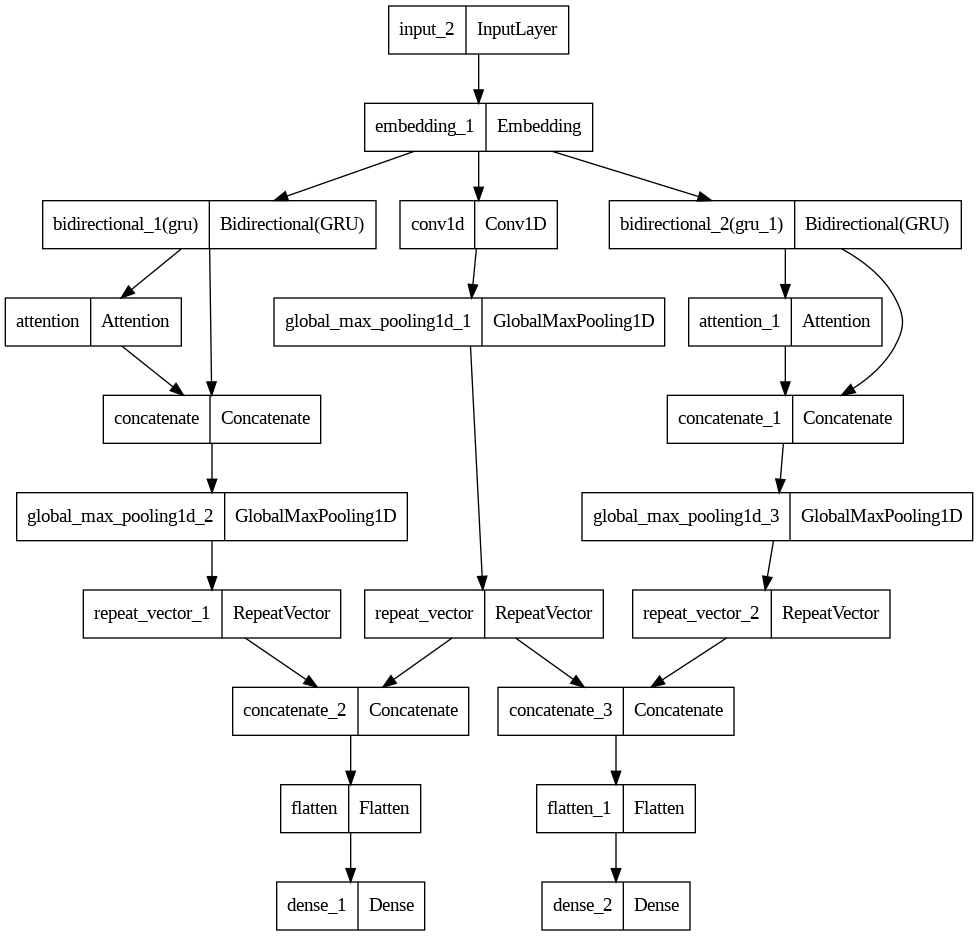

In [111]:
plot_model(model)

In [112]:
from keras.src.layers import Concatenate
sequence_len=25
embedding_dim=100
input_shape=(sequence_len,)
input_layer = Input(shape=input_shape)
embedding_layer = Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],trainable=False)(input_layer)

BiGRU_layer = Bidirectional(GRU(64,return_sequences=True))(embedding_layer)
attention_layer = Attention()([BiGRU_layer,BiGRU_layer])
concatenated_layer = Concatenate(axis=-1)([attention_layer,BiGRU_layer])
gmp_layer = GlobalMaxPool1D()(concatenated_layer)

dense_layer1 = Dense(64,activation='relu')(gmp_layer)
dense_layer2 = Dense(64,activation='relu')(gmp_layer)

output_sarcasm = Dense(1,activation='sigmoid')(dense_layer1)
concatenated_for_stress = Concatenate(axis=-1)([dense_layer2,output_sarcasm])
output_stress = Dense(1,activation='sigmoid')(concatenated_for_stress)

model = Model(inputs=input_layer,outputs=[output_sarcasm,output_stress])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 25, 100)              1090000   ['input_3[0][0]']             
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 25, 128)              63744     ['embedding_2[0][0]']         
 onal)                                                                                            
                                                                                                  
 attention_2 (Attention)     (None, 25, 128)              0         ['bidirectional_3[0][0]'

In [122]:
history = model.fit(X_train,[y_train_task1,y_train_task2],validation_data=(X_val,[y_val_task1,y_val_task2]),epochs=1,batch_size=32)

596/596 [==============================] - 11s 18ms/step - loss: 0.2188 - dense_5_loss: 0.1690 - dense_6_loss: 0.0499 - dense_5_accuracy: 0.9337 - dense_6_accuracy: 0.9837 - val_loss: 0.1875 - val_dense_5_loss: 0.1516 - val_dense_6_loss: 0.0359 - val_dense_5_accuracy: 0.9402 - val_dense_6_accuracy: 0.9887


In [123]:
print(history.history.keys())

dict_keys(['loss', 'dense_5_loss', 'dense_6_loss', 'dense_5_accuracy', 'dense_6_accuracy', 'val_loss', 'val_dense_5_loss', 'val_dense_6_loss', 'val_dense_5_accuracy', 'val_dense_6_accuracy'])


In [129]:
# Extract validation accuracies for both tasks
val_task1_accuracy = history.history['val_dense_5_accuracy']   # Replace with the correct task 1 validation accuracy key
val_task2_accuracy = history.history['val_dense_6_accuracy']  # Replace with the correct task 2 validation accuracy key

# Print the validation accuracies
print('Validation Accuracy - Task 1_Sarcsam:', val_task1_accuracy)
print('Validation Accuracy - Task 2_Stress:', val_task2_accuracy)

Validation Accuracy - Task 1_Sarcsam: [0.9401888847351074]
Validation Accuracy - Task 2_Stress: [0.988667368888855]


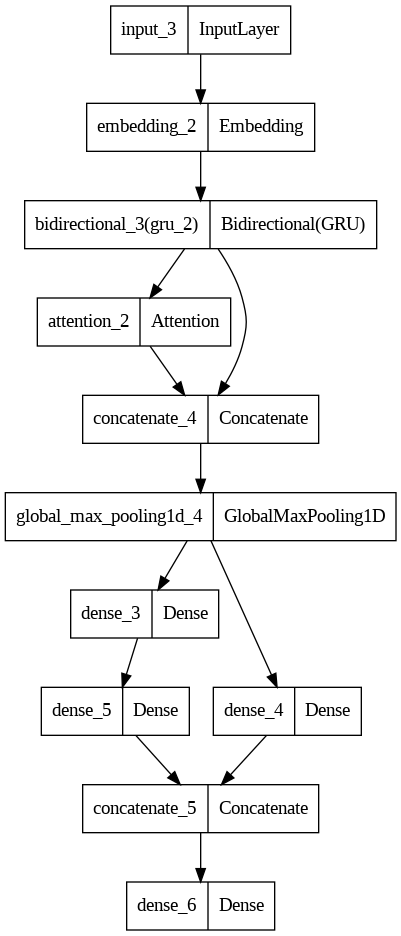

In [114]:
plot_model(model)

In [115]:
y_pred_task1,y_pred_task2 = model.predict(X_val)

149/149 [==============================] - 2s 5ms/step


In [116]:
print(y_pred_task1)

[[0.01449621]
 [0.14769581]
 [0.02947803]
 ...
 [0.01302757]
 [0.03250751]
 [0.04644303]]


In [117]:
print(y_pred_task2)

[[0.99967027]
 [0.9975714 ]
 [0.1568505 ]
 ...
 [0.98473513]
 [0.99833506]
 [0.9995067 ]]


In [118]:
threshold=0.5
y_pred_binary1 = np.where(y_pred_task1>=threshold ,1,0)
print(y_pred_binary1)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [119]:
y_pred_binary2 = np.where(y_pred_task2>=threshold ,1,0)
print(y_pred_binary2)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [120]:
f1_score_Sarcasm = f1_score(y_val_task1,y_pred_binary1)
print(f1_score_Sarcasm )

0.11976047904191618


In [121]:
f1_score_Stress = f1_score(y_val_task1,y_pred_binary2)
print(f1_score_Stress )

0.11836337067705797
